In [77]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('DelayedFlights.csv')
data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
data.dtypes

Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
Year                  int64
Month                 int64
DayofMonth            int64
DayOfWeek             int64
UniqueCarrier         object
FlightNum             int64
TailNum               object
ActualElapsedTime     float64
CRSElapsedTime        float64
AirTime               float64
ArrDelay              float64
DepDelay              float64
Origin                object
Dest                  object
Distance              int64
TaxiIn                float64
TaxiOut               float64
Cancelled             int64
CancellationCode      object
Diverted              int64
CarrierDelay          float64
WeatherDelay          float64
NASDelay              float64
SecurityDelay         float64
LateAircraftDelay     float64
Departure             datetime64[ns]
ScheduledDeparture    datetime64[ns]
Arrival               datetime64[ns]
ScheduledArrival      datetime64[ns]
dtypes: da

In [78]:
data.drop(data.columns[0], inplace=True, axis=1)

In [66]:
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Transforming time-related columns to datetime

In [67]:
def translate_times(data, cols, outcols):
    for i in range(len(cols)):
        col = cols[i]
        outcol = outcols[i]
        
        data.loc[data[col] == 2400, col] = 0
        t1 = data.loc[data[col].notnull(), col].astype(int).astype(str).str.zfill(4)
        data[outcol] = t1.str[0:2] + ':' + t1.str[2:4] + ':00'
        data[outcol] = pd.to_datetime(data.loc[data[outcol].notnull(), outcol], format="%H:%M:%S") 
        
    data.drop(cols, axis=1, inplace=True)


In [79]:
cols = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']
outcols = ['Departure', 'ScheduledDeparture', 'Arrival', 'ScheduledArrival']

translate_times(data, cols, outcols)
data.head()

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Departure,ScheduledDeparture,Arrival,ScheduledArrival
0,2008,1,3,4,WN,335,N712SW,128.0,150.0,116.0,...,0,NaN,NaN,NaN,NaN,NaN,1900-01-01 20:03:00,1900-01-01 19:55:00,1900-01-01 22:11:00,1900-01-01 22:25:00
1,2008,1,3,4,WN,3231,N772SW,128.0,145.0,113.0,...,0,NaN,NaN,NaN,NaN,NaN,1900-01-01 07:54:00,1900-01-01 07:35:00,1900-01-01 10:02:00,1900-01-01 10:00:00
2,2008,1,3,4,WN,448,N428WN,96.0,90.0,76.0,...,0,NaN,NaN,NaN,NaN,NaN,1900-01-01 06:28:00,1900-01-01 06:20:00,1900-01-01 08:04:00,1900-01-01 07:50:00
3,2008,1,3,4,WN,3920,N464WN,90.0,90.0,77.0,...,0,2.0,0.0,0.0,0.0,32.0,1900-01-01 18:29:00,1900-01-01 17:55:00,1900-01-01 19:59:00,1900-01-01 19:25:00
4,2008,1,3,4,WN,378,N726SW,101.0,115.0,87.0,...,0,NaN,NaN,NaN,NaN,NaN,1900-01-01 19:40:00,1900-01-01 19:15:00,1900-01-01 21:21:00,1900-01-01 21:10:00


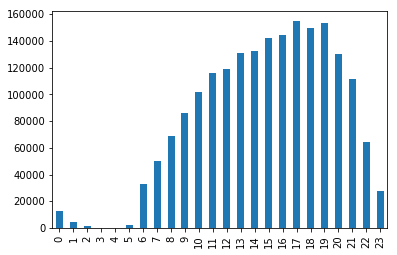

In [80]:
(data['Departure'].dt.hour).value_counts().loc[range(0,24)].plot(kind='bar')

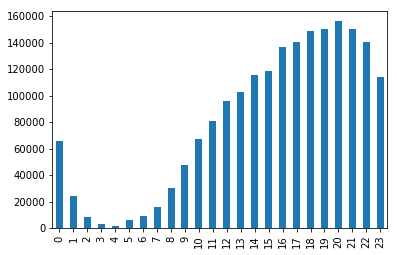

In [81]:
(data['Arrival'].dt.hour).value_counts().loc[range(0,24)].plot(kind='bar')

In [82]:
data['DepartureDelay'] = data['Departure'] - data['ScheduledDeparture']
data['ArrivalDelay'] = data['Arrival'] - data['ScheduledArrival']
data.loc[data['ArrivalDelay'] < pd.Timedelta(0), 'ArrivalDelay'] = 0
data.head()

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Departure,ScheduledDeparture,Arrival,ScheduledArrival,DepartureDelay,ArrivalDelay
0,2008,1,3,4,WN,335,N712SW,128.0,150.0,116.0,...,NaN,NaN,NaN,NaN,1900-01-01 20:03:00,1900-01-01 19:55:00,1900-01-01 22:11:00,1900-01-01 22:25:00,00:08:00,00:00:00
1,2008,1,3,4,WN,3231,N772SW,128.0,145.0,113.0,...,NaN,NaN,NaN,NaN,1900-01-01 07:54:00,1900-01-01 07:35:00,1900-01-01 10:02:00,1900-01-01 10:00:00,00:19:00,00:02:00
2,2008,1,3,4,WN,448,N428WN,96.0,90.0,76.0,...,NaN,NaN,NaN,NaN,1900-01-01 06:28:00,1900-01-01 06:20:00,1900-01-01 08:04:00,1900-01-01 07:50:00,00:08:00,00:14:00
3,2008,1,3,4,WN,3920,N464WN,90.0,90.0,77.0,...,0.0,0.0,0.0,32.0,1900-01-01 18:29:00,1900-01-01 17:55:00,1900-01-01 19:59:00,1900-01-01 19:25:00,00:34:00,00:34:00
4,2008,1,3,4,WN,378,N726SW,101.0,115.0,87.0,...,NaN,NaN,NaN,NaN,1900-01-01 19:40:00,1900-01-01 19:15:00,1900-01-01 21:21:00,1900-01-01 21:10:00,00:25:00,00:11:00


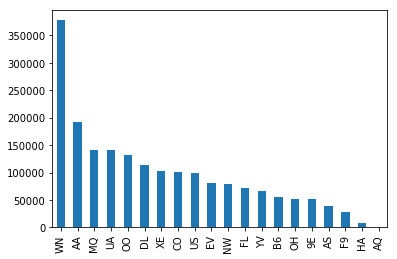

In [86]:
data['UniqueCarrier'].value_counts().plot(kind='bar')

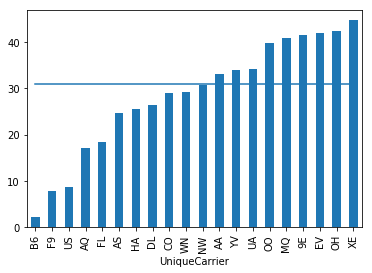

In [113]:
data.groupby('UniqueCarrier')['DepartureDelay'].apply(lambda x: (x.dt.total_seconds()/60).mean()).sort_values().plot(kind='bar')

avg_delay = (data['DepartureDelay'].dt.total_seconds()/60).mean()
plt.plot(range(len(data.groupby('UniqueCarrier').groups)), avg_delay*np.ones(len(data.groupby('UniqueCarrier').groups)))

### FFR

In [58]:
data['ArrTime2'] = data.loc[data['ArrTime'].notnull(), 'ArrTime']
data.loc[data['ArrTime2'] == 2400, 'ArrTime2'] = 0
t1 = data.loc[data['ArrTime2'].notnull(), 'ArrTime2'].astype(int).astype(str).str.zfill(4)
data['Arrival'] = t1.str[0:2] + ':' + t1.str[2:4] + ':00'
data['Arrival'] = pd.to_datetime(data.loc[data['Arrival'].notnull(), 'Arrival'], format="%H:%M:%S")
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrTime2,Arrival
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,0,N,0,NaN,NaN,NaN,NaN,NaN,2211.0,1900-01-01 22:11:00
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,0,N,0,NaN,NaN,NaN,NaN,NaN,1002.0,1900-01-01 10:02:00
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,0,N,0,NaN,NaN,NaN,NaN,NaN,804.0,1900-01-01 08:04:00
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,0,N,0,2.0,0.0,0.0,0.0,32.0,1959.0,1900-01-01 19:59:00
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,0,N,0,NaN,NaN,NaN,NaN,NaN,2121.0,1900-01-01 21:21:00


In [38]:
data[data['WeatherDelay'] != 'NaN'].value_counts()

0.0       1148570
10.0         2868
6.0          2738
15.0         2709
7.0          2527
8.0          2522
9.0          2302
20.0         2083
5.0          2061
11.0         2026
12.0         1985
4.0          1969
16.0         1955
3.0          1936
17.0         1917
2.0          1875
13.0         1868
14.0         1866
18.0         1805
1.0          1747
19.0         1659
25.0         1602
30.0         1460
21.0         1450
22.0         1399
23.0         1347
24.0         1258
26.0         1224
28.0         1202
27.0         1145
           ...   
717.0           1
710.0           1
708.0           1
479.0           1
741.0           1
702.0           1
699.0           1
698.0           1
697.0           1
1070.0          1
685.0           1
735.0           1
742.0           1
789.0           1
765.0           1
779.0           1
777.0           1
775.0           1
1297.0          1
470.0           1
528.0           1
760.0           1
744.0           1
756.0           1
420.0     